In [1]:
# Imports
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

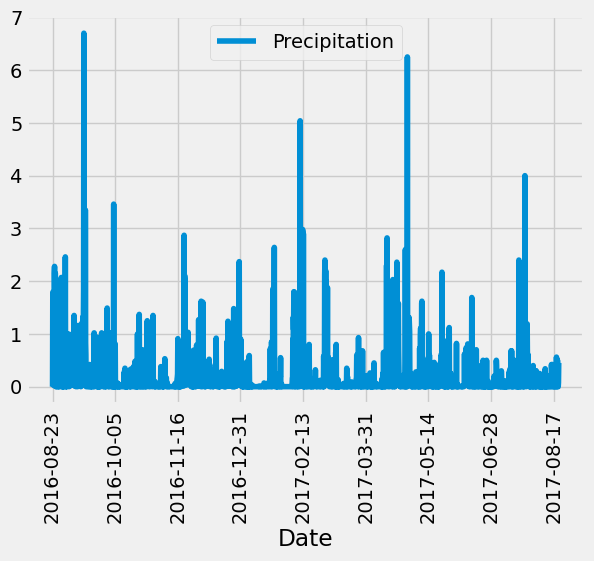

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
latest=session.query(measurement.date).order_by(measurement.date.desc()).first()
latest=dt.datetime.strptime(latest[0], '%Y-%m-%d')
one_year=dt.date(latest.year -1,latest.month, latest.day)
# Perform a query to retrieve the data and precipitation scores
p_data=session.query(measurement.date, measurement.prcp).filter(measurement.date>=one_year).all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
p_df=pd.DataFrame(p_data, columns=['Date', 'Precipitation']).set_index('Date')
# # # Sort the dataframe by date
p_df=p_df.sort_values(by='Date')
p_df=p_df.dropna(how='any')
# # # Use Pandas Plotting with Matplotlib to plot the data
p_df.plot(rot=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
p_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.id)).\
    group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number=active_stations[0][0]
most_active=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==station_number).all()
most_active

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

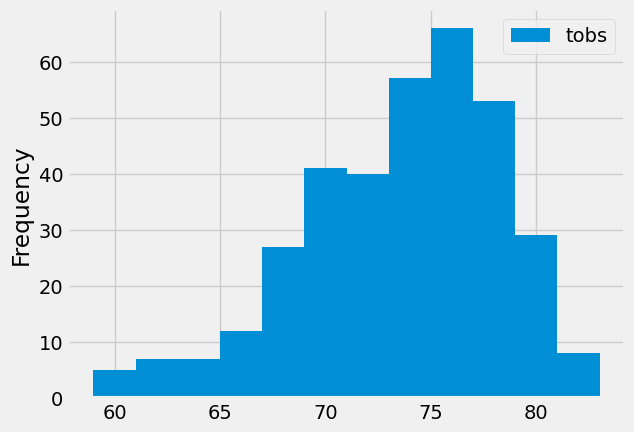

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year=session.query(measurement.date, measurement.tobs).filter(measurement.station==station_number).\
    filter(measurement.date>=one_year).all()
last_year_df=pd.DataFrame(last_year)
last_year_df.plot.hist(bins=12)

# Close Session

In [16]:
# Close Session
session.close()